Dalam dunia industri tidak heran jika kita sering menjumpai data yang sangat banyak dan terus meningkat seiring berjalannya waktu, seperti *e-commerce*, *e-government*, media elektronik dan sebagainya menghasilkan  data yang sangat besar hingga Gigabyte(Gb) bahkan bisa lebih, pada umumnya data yang dihasilkan memiliki derau/noise, tidak lengkap, dan tidak konsisten karena diperoleh dari berbagai  sumber yang berbeda.<br>

  Maka dari itu perlu dilakukan preprocessing data sebelum melakukan proses data mining, atau pemodelan. menurut Suyanto, D. (2017) terdapat tiga tujuan preprocessing data yaitu: 
 1. untuk mempermudah memahami data sehingga mempermudah dalam pemilihan teknik dan metode data mining atau machine learning
 2. untuk meningkatkan kualitas data sehingga hasil data mining menjadi lebih baik
 3. untuk meningkatkan efisiensi dan kemudahan dalam pembentukan model data mining atau machine learning
 
Data preprocessing bisa dilakuan dengan Pembersihan atau data cleansing, integrasi, reduksi, penambahan data, dan transformasi.<br>

Pada kesempatan kali ini saya akan membahas mengenai salah satu teknik data preprocessing yaitu data cleansing, karena waktu yang dibutuhkan oled data science dalam data cleansing lebih banyak dari pada proses pemodelan dan analisa. **Data Cleansing** atau Pembersihan data merupakan proses menghilang-kan noise dan data yang tidak konsisten atau data tidak relevan.

Data yang akan saya gunakan dalam artikel ini adalah data dari DQLab Telco data dapat unduh dilaman berikut https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv. DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience nya sehingga tidak akan di tinggalkan pelanggan. langkah data cleansing yang akan dilakukan adalah

1. Mencari ID pelanggan (Nomor telphone) yang valid
2. Mengatasi data-data yang masih kosong (Missing Values)
3. Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable
4. Menstandarisasi Nilai dari Variable

pada artikel ini saya tidak hanya akan mengikuti sesuai arahan course di dqlab akan tetapi akan saya gabungkan dengan beberapa hal yang telah saya pelajari dari berbagai sumber belajar. <br>

sekarang hal pertama yang akan kita lakukan adalah melakukan import library dan dataset ke dalam workspace kita.

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from jcopml.plot import plot_missing_value
pd.options.display.max_columns=50

**NumPy** (Numerical Python) adalah library Python yang fokus pada scientific computing. NumPy memiliki kemampuan untuk membentuk objek N-dimensional array, yang mirip dengan list pada Python. Keunggulan NumPy array dibandingkan dengan list pada Python adalah konsumsi memory yang lebih kecil serta runtime yang lebih cepat. NumPy juga memudahkan kita pada Aljabar Linear, terutama operasi pada Vector (1-d array) dan Matrix (2-d array).

**Pandas** Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data. Pandas menyediakan struktur data dan fungsi high-level untuk membuat pekerjaan dengan data terstruktur/tabular lebih cepat, mudah, dan ekspresif.

**jcopml** merupakan package yang dibuat oleh Wira Dharma Kencana Putra, package ini mencakup fungsi untuk membantu visualisasi, tuning, pipeline, dan feature importance. Dalam penelitian ini saya menggunakan fungsi `plot_missing_plot_missing_value()` untuk membantu saya dalam mendeteksi missing value dari data

# Import Data

In [2]:
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv")
df.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['UpdatedAt', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

### Nomenklatur data


- `UpdatedAt` Periode Data diambil
- `customerID` Customer ID
- `gender` Berisikan gender dari customer (Male, Female)
- `SeniorCitizen` Apakah pelanggan adalah senior citizen atau bukan (1, 0)
- `Partner` Apakah pelanggan memiliki Partner atau tidak (Yes, No)
- `Dependents` Berisikan apakah pelanggan memiliki tanggungan atau tidak (Yes, No)
- `tenure` lamanya pelangan telah tinggal di sebuah perusahaan dalam bulan
- `PhoneService` Apakah Customer memiliki layanan telepon atau tidak (Yes, No)
- `MultipleLines` Apakah Customer memiliki banyak jalur atau tidak (Yes, No, No phone service)
- `InternetService` jenis Customer internet service provider (DSL, Fiber optic, No)
- `OnlineSecurity` Apakah Customer memiliki keamanan online atau tidak (Yes, No, No internet service)
- `OnlineBackup` Apakah pelanggan memiliki cadangan online atau tidak (Yes, No, No internet service)
- `DeviceProtection` Apakah pelanggan memiliki perlindungan perangkat atau tidak (Yes, No, No internet service)
- `TechSupport` apakah Customer memiliki tech support atau tidak (Yes, No, No internet service)
- `StreamingTV` Apakah Customer memiliki streaming TV atau tidak (Yes, No, No internet service)
- `StreamingMovies` Apakah Customer memiliki streaming movies atau tidak (Yes, No, No internet service)
- `Contract` Jangka waktu kontrak (Month-to-month, One year, Two year)
- `PaperlessBilling` Apakah Customer memiliki paperless billing atau tidak (Yes, No)
- `PaymentMethod` Tmetode pembayaran yang dipilih customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- `MonthlyCharges` Jumlah yang dibebankan ke pelanggan setiap bulan
- `TotalCharges` Jumlah total yang dibebankan kepada pelanggan
- `Churn` Apakah pelanggan tersebut curn atau tidak (Yes or No)



In [5]:
#Tampilkan jumlah baris dan kolom
print(df.shape)

#Tampilkan 5 data teratas
print(df.head(5))

#Jumlah ID yang unik
print(df['customerID'].nunique())

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport St

#  Memfilter ID Number Pelanggan Format Tertentu

untuk mencari format ID Number(Phone Number) pelanggan harus memenuhi kriteria :

- Panjang karakter adalah 11-12.
- Terdiri dari Angka Saja, tidak diperbolehkan ada karakter selain angka
- Diawali dengan angka 45 2 digit pertama.


In [6]:
df['valid_id'] = df['customerID'].astype(str).str.match(r'(45\d{9,10})')
df = (df[df['valid_id'] == True]).drop('valid_id', axis = 1)
print('Hasil jumlah ID Customer yang terfilter adalah',df['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


# Memfilter Duplikasi ID Number Pelanggan

Memastikan bahwa tidak ada Id Number pelanggan yang duplikat. Biasanya duplikasi ID number ini tipenya:

- Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya
- Duplikasi dikarenakan inserting beda periode pengambilan data

In [19]:
# Drop Duplicate Rows
df.drop_duplicates()
# Drop duplicate ID sorted by Periode
df = df.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


# Mengatasi Missing Values dengan Penghapusan Rows

Hal pertama yang harus kita lakuan adalah mendeteksi missing value pada data, agar kita bisa melihat keseluruhan data yang hilang dapat dilakukan dengan visualisasi missing value menggunakan fungsi `plot_missing_value()` dari library jcopml atau juga bisa menggunakan fungsi `isnull()`

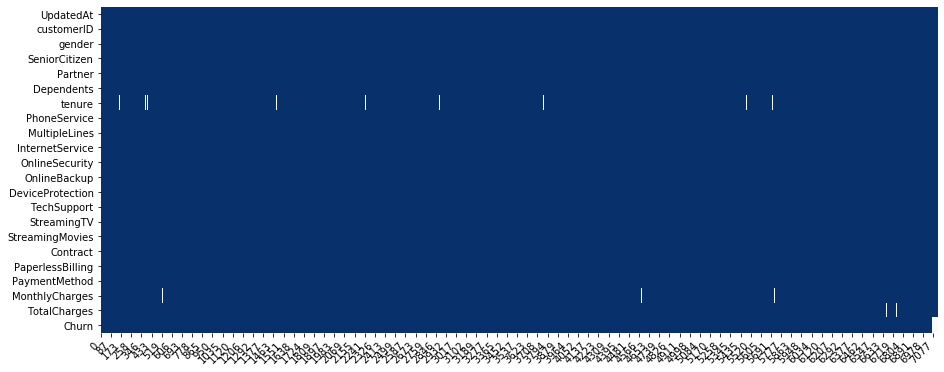

In [15]:
plot_missing_value(df,figsize=(15,6))

In [20]:
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df.isnull().sum().sort_values(ascending=False))


Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
Churn               43
MonthlyCharges      26
TotalCharges        15
InternetService      0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
UpdatedAt            0
dtype: int64


In [21]:
print('Total missing values data dari kolom Churn',df['Churn'].isnull().sum())
# Dropping all Rows with spesific column (churn)
df.dropna(subset=['Churn'],inplace=True)
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah',df.shape)

Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
df_load.head()

In [ ]:
df_load.tenure.describe()

In [ ]:
# handling missing values Tenure fill with 11
df['tenure'].fillna(11, inplace=True)

In [22]:
# Handling missing values num vars (except Tenure)
for col_name in list(['tenure','MonthlyCharges','TotalCharges']):
	median = df[col_name].median()
	df[col_name].fillna(median, inplace=True)

print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df.isnull().sum().sort_values(ascending=False))


Jumlah Missing Values setelah di imputer datanya, adalah:
Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
UpdatedAt           0
dtype: int64


# Mendeteksi adanya Outlier (Boxplot)

Mendeteksi Pencilan dari suatu Nilai (Outlier) salah satunya bisa melihat plot dari data tersebut menggunakan Box Plot. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan. package yang dapat digunakan untuk visualisasi data yaitu `matplotlib` dan `seaborn`


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.747914       65.783741   2305.083460
std      25.058407       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      30.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


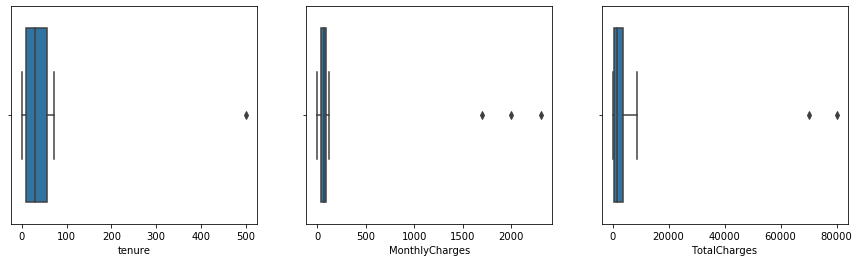

In [43]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df[['tenure','MonthlyCharges','TotalCharges']].describe())


plt.figure(figsize=(15,4))
plt.subplot(131)
sns.boxplot(x=df['tenure'])

plt.subplot(132)
sns.boxplot(x=df['MonthlyCharges'])

plt.subplot(133)
sns.boxplot(x=df['TotalCharges'])


# Mengatasi Outlier

Setelah kita mengetahui variable mana saja yang terdapat pencilan (Outlier), selanjutnya kita akan atasi Outlier dengan menggunakan metode interquartile range (IQR).

In [44]:
Q1 = (df[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 +(1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1-(1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than = (df > maximum)
lower_than = (df < minimum)
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df[['tenure','MonthlyCharges','TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.693813       64.992201   2286.058750
std      24.447925       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      30.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


# Mendeteksi Nilai yang tidak Standar

Mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard. Hal ini biasanya terjadi dikarenakan kesalahan input data. Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu dibutuhkan standarisasi dari data yang sudah terinput.

Gunakan fungsi `value_counts()` untuk melihat jumlah data unique per variable nya

In [ ]:
df_load[:1]

In [ ]:
df_load.columns

In [45]:
cat_col = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

In [47]:
for col_name in list(cat_col):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable =>',col_name)
    print(df[col_name].value_counts())


Unique Values Count Before Standardized  Variable => gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable => SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable => Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable => Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable => PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable => MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable => InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Uniq

# Menstandarisasi Variable Kategorik

Setelah kita mengeteahui variable mana saja yang ada nilai tidak standar, maka kita standarkan dengan pola terbanyak nya, dengan syarat tanpa mengubah maknanya. Contoh : Iya -> Yes Kemudian liat kembali unique values dari masing-masing variable yang sudah di ubah. menggunakan fungsi `replace()` untuk menstandarkan nilai

In [48]:
df = df.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

# Masukkan variable
for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


# Reference

- Suyanto, D. (2017). Data Mining untuk klasifikasi dan klasterisasi data. Bandung: Informatika Bandung.
